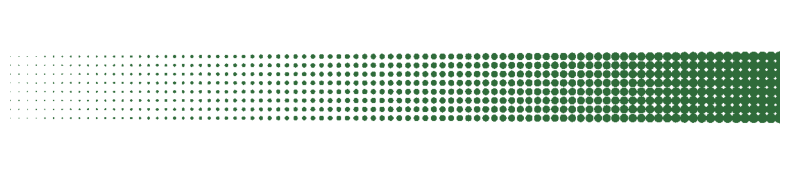

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

COLOR = np.array(mcolors.to_rgb("#2f6b3a"))

def moran_size_gradient_fixed_grid(
    width=1200,
    height=240,
    n_cols=90,
    n_rows=16,        # mehr Reihen
    band_height=160,  # <<< MACHT ES DICKER
    r_min=0.8,
    r_max=8,
    gamma=1
):
    img = np.ones((height, width, 3))

    xs = np.linspace(0, width - 1, n_cols)

    cy = height / 2
    ys = np.linspace(cy - band_height/2,
                     cy + band_height/2,
                     n_rows)

    yy, xx = np.ogrid[:height, :width]

    for xi, x in enumerate(xs):
        t = xi / (n_cols - 1)
        t = t ** gamma
        r = r_min + t * (r_max - r_min)

        for y in ys:
            mask = (xx - x)**2 + (yy - y)**2 <= r**2
            img[mask] = COLOR

    return img


def show(img):
    plt.figure(figsize=(14, 2))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


img = moran_size_gradient_fixed_grid()
show(img)

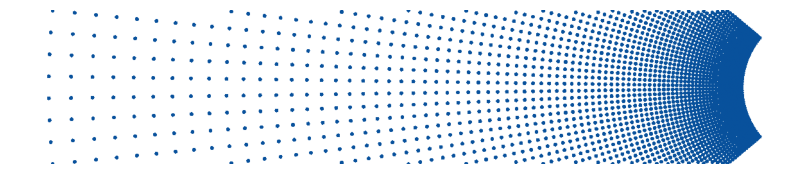

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

COLOR = np.array(mcolors.to_rgb("#08519c"))

def geary_radial_stable(
    width=1200,
    height=240,
    n_rays=50,        # <<< deutlich mehr
    n_points=80,      # <<< deutlich mehr
    point_radius=3   # <<< leicht kleiner
):
    img = np.ones((height, width, 3))
    yy, xx = np.ogrid[:height, :width]

    cx = width * 1.05
    cy = height / 2

    angle_span = np.deg2rad(80)
    angles = np.linspace(-angle_span/2, angle_span/2, n_rays)

    r_max = width * 1.0
    r_min = width * 0.1
    radii = np.geomspace(r_max, r_min, n_points)

    for theta in angles:
        cos_t = np.cos(theta)
        sin_t = np.sin(theta)

        for r in radii:
            # KEIN int() !!!
            x = cx - r * cos_t
            y = cy - r * sin_t

            if 0 <= x < width and 0 <= y < height:
                mask = (xx - x)**2 + (yy - y)**2 <= point_radius**2
                img[mask] = COLOR

    return img


def show(img):
    plt.figure(figsize=(14, 2))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


img = geary_radial_stable()
show(img)

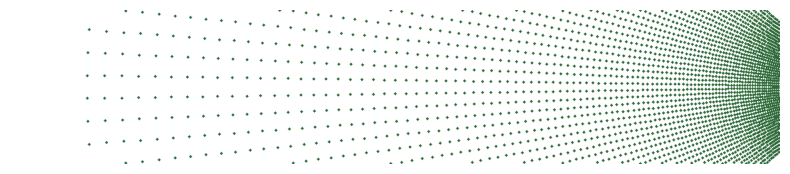

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#COLOR = np.array(mcolors.to_rgb("#08519c"))
COLOR = np.array(mcolors.to_rgb("#2f6b3a"))


def geary_radial_stable(width=1200, height=240,
                        n_rays=48, n_points=100, point_radius=2):

    img = np.ones((height, width, 3))

    yy, xx = np.ogrid[:height, :width]

    # ✔ Zentrum gut sichtbar aber außerhalb rechts
    cx = width * 1.1
    cy = height / 2

    # ✔ Winkelbereich so, dass alle Strahlen im Bild bleiben
    angle_span = np.deg2rad(80)  # ±20°
    angles = np.linspace(-angle_span/2, angle_span/2, n_rays)

    # ✔ Radien so, dass Punkte garantiert im Bild auftauchen
    r_max = width * 1.0   # weit draußen (links sichtbar)
    r_min = width * 0.1   # rechts Verdichtung (nah am Rand)

    # ✔ exponentielle Verdichtung
    radii = np.geomspace(r_max, r_min, n_points)

    for theta in angles:
        for r in radii:

            x = int(cx - r * np.cos(theta))
            y = int(cy - r * np.sin(theta))

            if 0 <= x < width and 0 <= y < height:
                mask = (xx - x)**2 + (yy - y)**2 <= point_radius**2
                img[mask] = COLOR

    return img


def show(img, title):
    plt.figure(figsize=(14, 2))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


img = geary_radial_stable()
show(img, "Local Geary – stabile Radial-Textur mit sichtbarem Zoom")

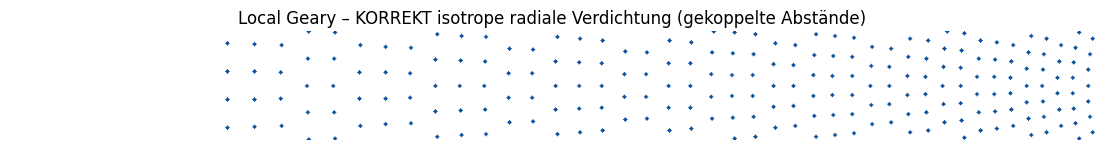

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

COLOR = np.array(mcolors.to_rgb("#08519c"))

def geary_radial_isotropic(width=1200, height=120,
                           n_rings=60, base_dr=20,
                           compression=3.0, c=1.0,
                           point_radius=2):

    img = np.ones((height, width, 3))
    yy, xx = np.ogrid[:height, :width]

    cx = width * 1.2
    cy = height / 2

    # Radial steps: groß → klein
    step_factors = np.linspace(1.0, 1.0 / compression, n_rings)
    step_factors /= step_factors.sum()

    drs = base_dr * n_rings * step_factors
    radii = [np.sum(drs)]
    for dr in drs[:-1]:
        radii.append(radii[-1] - dr)
    radii = np.array(radii)

    theta_center = np.deg2rad(0)
    max_angle = np.deg2rad(20)   # 40° span total

    for r, dr in zip(radii, drs):

        # KORREKT: gekoppelte Winkelauflösung
        dtheta = c * dr / max(r, 1e-6)   

        # RING: verschiedene Anzahl Punkte abhängig von r
        n_theta = int(2 * max_angle / dtheta) + 1
        thetas = np.linspace(-max_angle, max_angle, n_theta)

        for theta in thetas:
            x = int(cx - r * np.cos(theta))
            y = int(cy - r * np.sin(theta))

            if 0 <= x < width and 0 <= y < height:
                mask = (xx - x)**2 + (yy - y)**2 <= point_radius**2
                img[mask] = COLOR

    return img


def show(img, title):
    plt.figure(figsize=(14, 2))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


img = geary_radial_isotropic()
show(img, "Local Geary – KORREKT isotrope radiale Verdichtung (gekoppelte Abstände)")

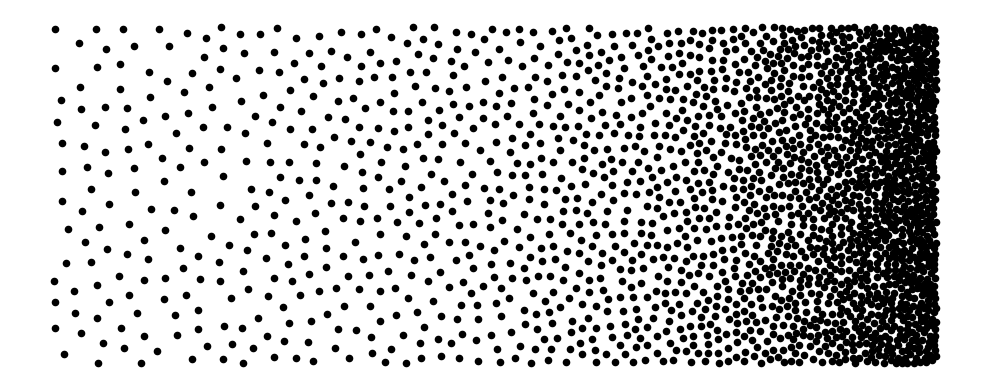

In [2]:
import random
import math
import matplotlib.pyplot as plt

W, H = 10, 4
points = []
MAX_TRIES = 200000

def min_dist(x):
    # links groß, rechts klein
    return 0.25 - 0.2 * (x / W)

for _ in range(MAX_TRIES):
    x = random.random() * W
    y = random.random() * H
    d_min = min_dist(x)

    ok = True
    for px, py in points:
        if (x-px)**2 + (y-py)**2 < d_min**2:
            ok = False
            break

    if ok:
        points.append((x, y))

xs, ys = zip(*points)

plt.figure(figsize=(10,4))
plt.scatter(xs, ys, s=20, c="black")
plt.axis("off")
plt.tight_layout()
plt.show()

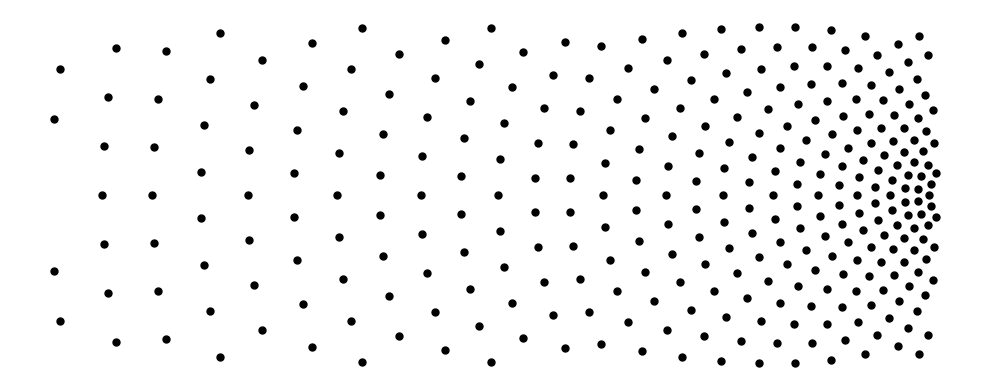

In [15]:
import numpy as np
import matplotlib.pyplot as plt

W, H = 10, 4

# Zentrum bewusst näher, damit Radialität sichtbar wird
cx = W + 0.4
cy = H / 2

# starke Dichtevariation
d_left  = 0.6   # links locker
d_right = 0.12  # rechts dicht

points_x = []
points_y = []

# maximaler Radius, der das Bild erreicht
r_max = np.sqrt((cx)**2 + (H)**2)

r = 0.0
while r < r_max:
    # x-Position am linken Rand dieses Rings (repräsentativ)
    # -> steuert DICHTE
    sample_x = max(0, cx - r)

    t = sample_x / W
    d = np.sqrt((1 - t) * d_left**2 + t * d_right**2)

    circumference = 2 * np.pi * r
    n = max(1, int(circumference / d))

    for i in range(n):
        angle = 2 * np.pi * i / n
        x = cx + r * np.cos(angle)
        y = cy + r * np.sin(angle)

        if 0 <= x <= W and 0 <= y <= H:
            points_x.append(x)
            points_y.append(y)

    r += d

plt.figure(figsize=(10,4))
plt.scatter(points_x, points_y, s=25, c="black")
plt.axis("off")
plt.tight_layout()
plt.show()